Intial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

# Load training data
df = pd.read_csv('../data/KDDTrain+.txt', 
                 names=column_names,
                 header=None)

print(f"✅ Dataset loaded!")
print(f"Shape: {df.shape}")
print(f"Total connections: {len(df):,}")

✅ Dataset loaded!
Shape: (125973, 43)
Total connections: 125,973


In [6]:
print("First 5 rows:")
print(df.head())

print("\n" + "="*80 + "\n")

print("Last 5 rows:")
print(df.tail())

First 5 rows:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_she

In [7]:
print("Dataset Info:")
df.info()

print("\n" + "="*80 + "\n")

# Show data types
print("Data Types:")
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null

In [8]:
missing = df.isnull().sum()

# Show only columns with missing values
missing_cols = missing[missing > 0]

if len(missing_cols) > 0:
    print("⚠️ Columns with missing values:")
    print(missing_cols)
    print(f"\nTotal missing: {missing.sum():,}")
else:
    print("No missing values found!")

No missing values found!


In [9]:
print("Numerical Features Summary:")
print(df.describe())

# Save to CSV for later reference
df.describe().to_csv('../results/basic_statistics.csv')
print("\n✅ Statistics saved to results/basic_statistics.csv")

Numerical Features Summary:
           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%    

Label Distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


Percentages:
label
normal             53.46
neptune            32.72
satan               2.88
ipsweep             2.86
portsweep           2.33
smurf               2.10
nmap                1.19
back                0.76
teardrop            0.71
warezclient         0.71
pod                 0.16
guess_passwd        0.04
buffer_overflow     0.02
warezmaster         0.02
la

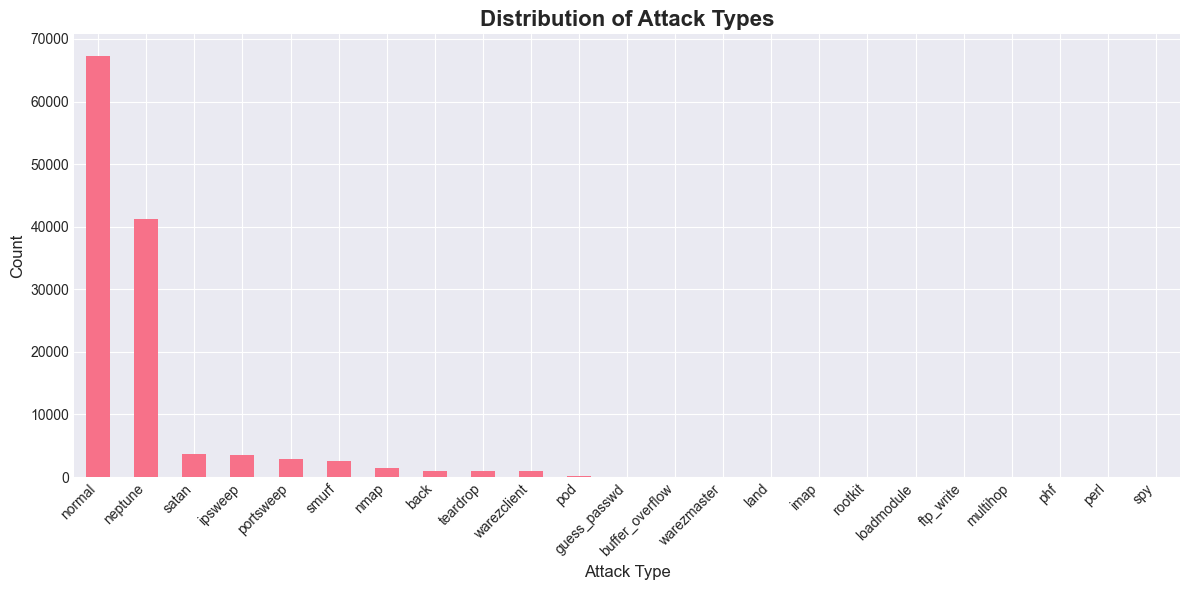


Plot saved to results/label_distribution.png


In [11]:
label_counts = df['label'].value_counts()

print("Label Distribution:")
print(label_counts)

print("\n" + "="*80 + "\n")

# Calculate percentages
label_percentages = (label_counts / len(df) * 100).round(2)
print("Percentages:")
print(label_percentages)

# Visualize
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Attack Types', fontsize=16, fontweight='bold')
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../results/label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot saved to results/label_distribution.png")

In [12]:
from sklearn.model_selection import train_test_split
# Split 70% train, 30% test
# stratify ensures same label distribution in both sets
# random_state=42 makes split reproducible
train_df, test_df = train_test_split(
    df, 
    test_size=0.3,           # 30% for testing
    random_state=42,         # For reproducibility
    stratify=df['label']     # Maintain label distribution
)

print(f"Original dataset: {len(df):,} rows")
print(f"Training set: {len(train_df):,} rows ({len(train_df)/len(df)*100:.1f}%)")
print(f"Test set: {len(test_df):,} rows ({len(test_df)/len(df)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# Verify label distribution is similar
print("Training set labels:")
print(train_df['label'].value_counts(normalize=True).head())

print("\nTest set labels:")
print(test_df['label'].value_counts(normalize=True).head())

# Save split datasets
train_df.to_csv('../data/train_set.csv', index=False)
test_df.to_csv('../data/test_set.csv', index=False)

print("\nDatasets saved:")
print("   - data/train_set.csv")
print("   - data/test_set.csv")

Original dataset: 125,973 rows
Training set: 88,181 rows (70.0%)
Test set: 37,792 rows (30.0%)


Training set labels:
label
normal       0.534582
neptune      0.327168
satan        0.028838
ipsweep      0.028566
portsweep    0.023270
Name: proportion, dtype: float64

Test set labels:
label
normal       0.534584
neptune      0.327159
satan        0.028842
ipsweep      0.028577
portsweep    0.023259
Name: proportion, dtype: float64

Datasets saved:
   - data/train_set.csv
   - data/test_set.csv


In [14]:
# Summary report
summary = {
    'Total Connections': int(len(df)),
    'Features': int(df.shape[1] - 2),
    'Training Samples': int(len(train_df)),
    'Test Samples': int(len(test_df)),
    'Normal Traffic': int(len(df[df['label'] == 'normal'])),
    'Attack Traffic': int(len(df[df['label'] != 'normal'])),
    'Unique Attack Types': int(df['label'].nunique() - 1),
    'Missing Values': int(df.isnull().sum().sum()),
}

print("="*50)
print("DATASET SUMMARY")
print("="*50)
for key, value in summary.items():
    print(f"{key:.<40} {value:>8,}")
print("="*50)

# Save summary
import json
with open('../results/dataset_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\nDay 1 Complete!")
print("Next steps:")
print("1. Commit changes to GitHub")
print("2. Tomorrow: Deep EDA and SQL database setup")

DATASET SUMMARY
Total Connections.......................  125,973
Features................................       41
Training Samples........................   88,181
Test Samples............................   37,792
Normal Traffic..........................   67,343
Attack Traffic..........................   58,630
Unique Attack Types.....................       22
Missing Values..........................        0

Day 1 Complete!
Next steps:
1. Commit changes to GitHub
2. Tomorrow: Deep EDA and SQL database setup
